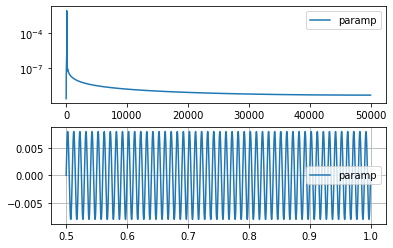

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from numba import jit

# This attempts to demonstrate appearance of sideband frequencies for 
# weak parametric drive.


@jit
def f(x,t):
        
    x1 = x[0]
    x2 = x[1]
    
    isOn = 1
    
    beta = 1000
    
    omega_s = 100 * 2*np.pi
    
    omega_0 = 100 * 2*np.pi
    
    omega_d = 200 * 2*np.pi
    
    RHS = 0*1e7*np.cos(omega_d*t) + 1e4*np.cos(omega_s*t)
    
    dx1dt = x2
    dx2dt = -2*beta*x2 - (omega_0**2)* (x1 + x1**3) + RHS
    
    return np.array([dx1dt,dx2dt])


@jit
def paramp(isOn,t,x):
    
    dt = t[1] - t[0]
    
    for i in range(0, len(t)-1):#
        
        k1 = f(x[i,:], t[i])
        k2 = f(x[i,:] + k1*dt/2, t[i] + dt/2) 
        k3 = f(x[i,:] + k2*dt/2, t[i] + dt/2) 
        k4 = f(x[i,:] + k3*dt, t[i] + dt) 
        
        x[i+1,:] = x[i,:] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        
    for i in range(0,1):
        #plt.plot(t,x[:,i]) 
        pass
        
    return t[50000:], x[50000:,i]

N = 2

t = np.linspace(0,1,100000)
x = np.zeros([len(t),N])
x0 = np.array([1,1])*0
x[0,:] = x0

t, x1 = paramp(True,t,x)

dt = t[1] - t[0]

# Number of sample points

N = len(x1)

# sample spacing

x1f = fft(x1)

tf = fftfreq(N, dt)[:N//2]

fig = plt.figure(1)

fig.subplots_adjust(hspace=0.25, wspace=0.2)

ax1 = fig.add_subplot(2, 1, 1)
ax1.grid()

ax1.semilogy(tf, 2.0/N * np.abs(x1f[0:N//2]),label='paramp')
ax1.grid()
ax1.legend()


ax2 = fig.add_subplot(2, 1, 2)
ax2.grid()
ax2.plot(t,x1,label='paramp')
ax2.legend()

